# Notebook for visualizing results

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

Load results

In [2]:
with open('results.P', 'rb') as f:
    results = pickle.load(f)
episodic_results = results['Episodic']
cortical_results = results['Cortical']

## Episodic memory system results

Learning curve for pre-training

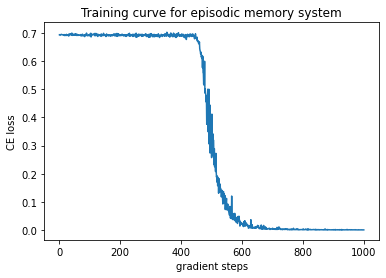

In [3]:
loss_data = episodic_results['loss']
plt.plot(loss_data)
plt.title("Training curve for episodic memory system")
plt.ylabel("CE loss")
plt.xlabel("gradient steps")
plt.show()

Train and test accuracy

In [4]:
print("Train accuracy:", episodic_results["train_acc"])
print("Test accuracy:", episodic_results["test_acc"])

Train accuracy: 1.0
Test accuracy: 1.0


Hub analysis

In [5]:
relevant = episodic_results['analysis']['rank_data']['relevant']
irrelevant = episodic_results['analysis']['rank_data']['irrelevant']

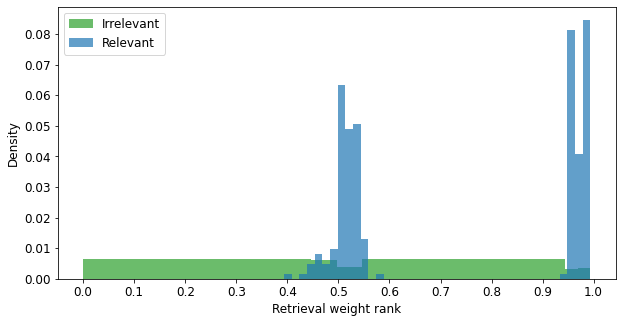

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(irrelevant, density=True, color='tab:green', alpha=0.7, bins=40)
ax.hist(relevant, density=True, color='tab:blue', alpha=0.7, bins=40)
xticks = [x for x in np.linspace(0,160,11)]
xticklabels = ["%.1f" % x for x in np.linspace(0,1,11)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Retrieval weight rank", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.legend(["Irrelevant", "Relevant"], prop={'size':12})
plt.show()

## Cortical system results

Learning curve

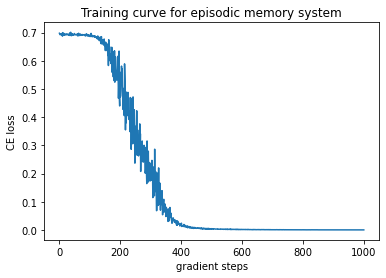

In [7]:
loss_data = cortical_results['loss']
plt.plot(loss_data)
plt.title("Training curve for episodic memory system")
plt.ylabel("CE loss")
plt.xlabel("gradient steps")
plt.show()

Train and test accuracy

In [8]:
print("Train accuracy:", cortical_results["train_acc"])
print("Test accuracy:", cortical_results["test_acc"])

Train accuracy: 1.0
Test accuracy: 1.0


Visualize embeddings in 2 dimensions (from PCA)

In [9]:
pca_results = cortical_results['analysis']['pca']
locs = pca_results['grid_locations']
pca_2d = pca_results['pca_2d']

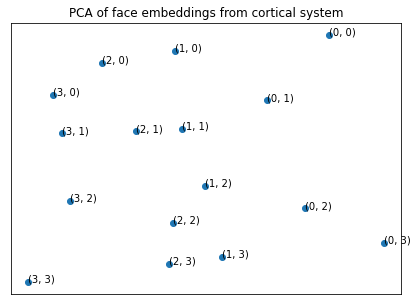

In [10]:
fig, ax = plt.subplots(figsize=[7,5])
ax.scatter(pca_2d[:,0], pca_2d[:,1])
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (pca_2d[i,0], pca_2d[i,1]))
ax.set_title("PCA of face embeddings from cortical system")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Correlation between distances between pairs of embeddings and distances between x,y coordinates in ground-truth grid

In [11]:
corr_results = cortical_results['analysis']['correlation']
print("r:", corr_results['r'], "p-value:", corr_results['p_val'])

r: 0.7945275408793435 p-value: 2.5026595529704705e-27
